# Análise de Vendas com Pandas

Este projeto tem como objetivo demonstrar, na prática, o uso da biblioteca Pandas
para limpeza, transformação e análise de dados de vendas.

Ao longo do notebook são abordados:
- Importação e inspeção de dados
- Tratamento de valores nulos
- Padronização de textos e datas
- Criação de novas métricas
- Análises exploratórias e agregações
- Merge entre bases
- Análise temporal de faturamento

# Importaçao

In [1]:
import pandas as pd
import numpy as np

# Visualizaçao inicial

In [2]:
df_vendas = pd.read_csv('Data\\vendas_tech.csv', low_memory=False)
display(df_vendas)

df_gerentes = pd.read_excel('Data\\gerentes_lojas.xlsx')
display(df_gerentes)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,2025-01-01
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,NaN
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859,NaN
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343,NaN
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,NaN
...,...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755,NaN
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879,NaN
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160,NaN
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545,NaN


,Loja,Gerente,Meta_Mensal
0,São Paulo,Carlos,50000
1,Rio de Janeiro,Fernanda,60000
2,Curitiba,Roberto,45000
3,Belo Horizonte,Juliana,1780100
4,Recife,Marcos,48000
5,Porto Alegre,Pedro,42000
6,Salvador,Ana,52000


In [3]:
#Inpeçao 
#display(df_vendas.head(15))
#display(df_vendas.tail(15))
display(df_vendas.sample(15))#Amostra

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
5808,5809,2023-02-13,Recife,Teclado Mecânico,250.0,5,Cliente_17845,NaN
94527,94528,2024-11-24,Belo Horizonte,iPhone 14,5500.0,1,Cliente_17309,NaN
91740,91741,2023-06-14,Belo Horizonte,iPhone 14,5500.0,2,Cliente_23389,NaN
43918,43919,2024-03-01,Curitiba,Notebook Dell,3500.0,2,Cliente_18991,NaN
90941,90942,2023-12-19,Curitiba,Teclado Mecânico,250.0,1,Cliente_9339,NaN
59335,59336,2024-02-19,Curitiba,Teclado Mecânico,250.0,1,Cliente_25304,NaN
31947,31948,2024-05-25,Salvador,iPhone 14,5500.0,1,Cliente_25009,NaN
86467,86468,2024-03-14,Porto Alegre,Cabo HDMI,40.0,2,Cliente_13524,NaN
31952,31953,2023-06-11,NaN,Teclado Mecânico,250.0,2,Cliente_11460,NaN
26198,26199,2023-07-22,Porto Alegre,Smartphone Samsung,2200.0,1,Cliente_3824,NaN


In [4]:
display(df_vendas.shape)
display(df_vendas.columns)

(100100, 8)

Index(['ID_Pedido', 'Data', 'Loja', 'Produto', 'Preco_Unitario', 'Qtd',
       'Cliente', 'Data_Base'],
      dtype='object')

In [5]:
display(df_vendas.info())
display(df_vendas.describe())
display(df_vendas.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_Pedido       100100 non-null  int64  
 1   Data            100100 non-null  object 
 2   Loja            98099 non-null   object 
 3   Produto         100100 non-null  object 
 4   Preco_Unitario  100100 non-null  float64
 5   Qtd             100100 non-null  int64  
 6   Cliente         100100 non-null  object 
 7   Data_Base       1 non-null       object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


None

,ID_Pedido,Preco_Unitario,Qtd
count,100100.000000,100100.000000,100100.000000
mean,50004.810180,2000.204595,1.499101
std,28866.872543,1841.050733,1.241605
min,1.000000,40.000000,1.000000
25%,25008.750000,120.000000,1.000000
50%,50004.500000,1200.000000,1.000000
75%,75002.250000,3200.000000,1.000000
max,100000.000000,5500.000000,10.000000


Index(['ID_Pedido', 'Data', 'Loja', 'Produto', 'Preco_Unitario', 'Qtd',
       'Cliente', 'Data_Base'],
      dtype='object')

In [6]:
# Seleçao de colunas
df_vendas['Loja']
df_vendas[['Loja', 'Cliente']]


,Loja,Cliente
0,São Paulo,Cliente_4095
1,Belo Horizonte,Cliente_8750
2,NaN,Cliente_14859
3,RIO DE JANEIRO,Cliente_17343
4,Rio de Janeiro,Cliente_23377
...,...,...
100095,Porto Alegre,Cliente_11755
100096,Porto Alegre,Cliente_12879
100097,Belo Horizonte,Cliente_8160
100098,Salvador,Cliente_28545


In [7]:
#Colunas
df_analise = df_vendas.drop(columns=['Data_Base'])


In [8]:
display(df_analise.head(5))
display(df_analise.columns)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377


Index(['ID_Pedido', 'Data', 'Loja', 'Produto', 'Preco_Unitario', 'Qtd',
       'Cliente'],
      dtype='object')

# Tratativa de nulos

In [9]:
#Nulos
#dropna() mas ele exclui tudo 

df_analise['Loja'] = df_analise['Loja'].fillna("Loja Online")

In [10]:
df_analise.info()
display(df_analise['Loja'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_Pedido       100100 non-null  int64  
 1   Data            100100 non-null  object 
 2   Loja            100100 non-null  object 
 3   Produto         100100 non-null  object 
 4   Preco_Unitario  100100 non-null  float64
 5   Qtd             100100 non-null  int64  
 6   Cliente         100100 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB


0              São Paulo
1         Belo Horizonte
2            Loja Online
3         RIO DE JANEIRO
4         Rio de Janeiro
               ...      
100095      Porto Alegre
100096      Porto Alegre
100097    Belo Horizonte
100098          Salvador
100099        São Paulo 
Name: Loja, Length: 100100, dtype: object

# Ajustes nas datas 

In [11]:
#Tipos de dados
df_analise['Data'] = pd.to_datetime(df_analise['Data'], format="%Y-%m-%d")

# Padronizaçao dos textos

In [12]:
#Padronizaçao de capitalize

df_analise['Loja'] = df_analise['Loja'].str.title() # deixa primeira letra de cada em caixa alta
df_analise['Loja'] = df_analise['Loja'].str.strip() # Trimm

df_analise['Produto'] = df_analise['Produto'].str.strip().str.title() 

df_analise['Cliente'] = df_analise['Cliente'].str.strip().str.capitalize() 

df_gerentes['Loja'] = df_gerentes['Loja'].str.strip().str.title() 

display(df_analise.head(5))

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,Iphone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,Loja Online,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377


In [13]:
#Duplicatas
#subset seleciona uma lista de colunas 
#Keep se tiver 2 iguais remove o ultimo last ou first

df_analise = df_analise.drop_duplicates(subset=["ID_Pedido"])


In [14]:
display(df_analise.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_Pedido       100000 non-null  int64         
 1   Data            100000 non-null  datetime64[ns]
 2   Loja            100000 non-null  object        
 3   Produto         100000 non-null  object        
 4   Preco_Unitario  100000 non-null  float64       
 5   Qtd             100000 non-null  int64         
 6   Cliente         100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.1+ MB


None

# Adiçao de novas colunas

In [15]:
#Faturamento
df_analise['Faturamento'] = df_analise['Preco_Unitario'] * df_analise['Qtd']

In [16]:
display(df_analise)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0
1,2,2023-03-01,Belo Horizonte,Iphone 14,5500.0,1,Cliente_8750,5500.0
2,3,2023-02-25,Loja Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0
...,...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732,240.0
99996,99997,2024-08-28,Rio De Janeiro,Cabo Hdmi,40.0,1,Cliente_25058,40.0
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864,4400.0
99998,99999,2023-11-04,Porto Alegre,Iphone 14,5500.0,1,Cliente_4205,5500.0


In [17]:
#Forma de venda
df_analise['Forma_de_Venda'] = np.where(df_analise['Loja'] == 'Loja Online', 'Online', 'Presencial')


In [18]:
display(df_analise)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0,Presencial
1,2,2023-03-01,Belo Horizonte,Iphone 14,5500.0,1,Cliente_8750,5500.0,Presencial
2,3,2023-02-25,Loja Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0,Online
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0,Presencial
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0,Presencial
...,...,...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732,240.0,Presencial
99996,99997,2024-08-28,Rio De Janeiro,Cabo Hdmi,40.0,1,Cliente_25058,40.0,Presencial
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864,4400.0,Presencial
99998,99999,2023-11-04,Porto Alegre,Iphone 14,5500.0,1,Cliente_4205,5500.0,Presencial


In [19]:
# Regiao
df_analise['Loja'].unique()

array(['São Paulo', 'Belo Horizonte', 'Loja Online', 'Rio De Janeiro',
       'Salvador', 'Recife', 'Curitiba', 'Porto Alegre'], dtype=object)

In [20]:
dict_regioes = {
    'São Paulo' : 'Sudeste',
    'Belo Horizonte' : 'Sudeste',
    'Loja Online' : 'Online',
    'Rio De Janeiro' : 'Sudeste',
    'Salvador' : 'Nordeste',
    'Recife' : 'Nordeste',
    'Curitiba' : 'Sul',
    'Porto Alegre' : 'Sul'
}

In [21]:
df_analise['Regiao'] = df_analise['Loja'].map(dict_regioes)

In [22]:
display(df_analise)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0,Presencial,Sudeste
1,2,2023-03-01,Belo Horizonte,Iphone 14,5500.0,1,Cliente_8750,5500.0,Presencial,Sudeste
2,3,2023-02-25,Loja Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0,Online,Online
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0,Presencial,Sudeste
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0,Presencial,Sudeste
...,...,...,...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732,240.0,Presencial,Sudeste
99996,99997,2024-08-28,Rio De Janeiro,Cabo Hdmi,40.0,1,Cliente_25058,40.0,Presencial,Sudeste
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864,4400.0,Presencial,Sul
99998,99999,2023-11-04,Porto Alegre,Iphone 14,5500.0,1,Cliente_4205,5500.0,Presencial,Sul


In [23]:
df_analise.isna().sum() # verifica se tem nulo

ID_Pedido         0
Data              0
Loja              0
Produto           0
Preco_Unitario    0
Qtd               0
Cliente           0
Faturamento       0
Forma_de_Venda    0
Regiao            0
dtype: int64

# Analises

In [24]:
#Filtros em base (Condicional, loc e iloc)
# Gerente pede a tabela com as vendas apenas de Sao Paulo

display(df_analise['Loja'].unique())

array(['São Paulo', 'Belo Horizonte', 'Loja Online', 'Rio De Janeiro',
       'Salvador', 'Recife', 'Curitiba', 'Porto Alegre'], dtype=object)

In [25]:
# loc precisa do indice
# .loc[indice, coluna]

loja = df_analise.loc[3,['Loja','Produto', 'Cliente']]
print(loja)

Loja       Rio De Janeiro
Produto       Mouse Gamer
Cliente     Cliente_17343
Name: 3, dtype: object


In [26]:
# iloc -> por posiçao

loja_iloc = df_analise.iloc[3,[2,3, 6]]
print(loja_iloc)

Loja       Rio De Janeiro
Produto       Mouse Gamer
Cliente     Cliente_17343
Name: 3, dtype: object


In [27]:
df_analise = df_analise.sort_values(by=['Data', 'Faturamento'])
df_analise = df_analise.reset_index(drop=True)

In [28]:
df_analise

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
0,1700,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_14435,40.0,Presencial,Sul
1,12848,2023-01-01,Belo Horizonte,Cabo Hdmi,40.0,1,Cliente_4327,40.0,Presencial,Sudeste
2,35599,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_18680,40.0,Presencial,Sul
3,37130,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_22886,40.0,Presencial,Sul
4,49140,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_24445,40.0,Presencial,Sul
...,...,...,...,...,...,...,...,...,...,...
99995,43207,2024-12-30,Belo Horizonte,Notebook Dell,3500.0,2,Cliente_15893,7000.0,Presencial,Sudeste
99996,94455,2024-12-30,Curitiba,Notebook Dell,3500.0,2,Cliente_17419,7000.0,Presencial,Sul
99997,35192,2024-12-30,Salvador,Iphone 14,5500.0,2,Cliente_7615,11000.0,Presencial,Nordeste
99998,60794,2024-12-30,Rio De Janeiro,Smartphone Samsung,2200.0,5,Cliente_9964,11000.0,Presencial,Sudeste


In [29]:
#Pegar valor por condicional
df_vendas_sp = df_analise[df_analise['Loja'] == 'São Paulo']

In [30]:
display(df_vendas_sp)
#df_vendas_sp.to_excel('Vendas_SP.xlsx', index=False)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
23,39483,2023-01-01,São Paulo,Mouse Gamer,120.0,1,Cliente_1274,120.0,Presencial,Sudeste
24,48375,2023-01-01,São Paulo,Mouse Gamer,120.0,1,Cliente_1544,120.0,Presencial,Sudeste
27,90270,2023-01-01,São Paulo,Mouse Gamer,120.0,1,Cliente_6418,120.0,Presencial,Sudeste
38,53171,2023-01-01,São Paulo,Teclado Mecânico,250.0,1,Cliente_19747,250.0,Presencial,Sudeste
40,59136,2023-01-01,São Paulo,Teclado Mecânico,250.0,1,Cliente_14239,250.0,Presencial,Sudeste
...,...,...,...,...,...,...,...,...,...,...
99978,7446,2024-12-30,São Paulo,Iphone 14,5500.0,1,Cliente_1302,5500.0,Presencial,Sudeste
99985,60640,2024-12-30,São Paulo,Iphone 14,5500.0,1,Cliente_13172,5500.0,Presencial,Sudeste
99990,77621,2024-12-30,São Paulo,Iphone 14,5500.0,1,Cliente_19106,5500.0,Presencial,Sudeste
99991,91693,2024-12-30,São Paulo,Iphone 14,5500.0,1,Cliente_17362,5500.0,Presencial,Sudeste


In [31]:
# Exportar vendas de 2024
df_analise_2024 = df_analise[df_analise['Data'].dt.year==2024]

In [32]:
display(df_analise_2024)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
50423,22735,2024-01-01,São Paulo,Cabo Hdmi,40.0,1,Cliente_14772,40.0,Presencial,Sudeste
50424,31751,2024-01-01,Curitiba,Cabo Hdmi,40.0,1,Cliente_16439,40.0,Presencial,Sul
50425,36481,2024-01-01,Salvador,Cabo Hdmi,40.0,1,Cliente_4025,40.0,Presencial,Nordeste
50426,44184,2024-01-01,Curitiba,Cabo Hdmi,40.0,1,Cliente_1577,40.0,Presencial,Sul
50427,44259,2024-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_1944,40.0,Presencial,Sul
...,...,...,...,...,...,...,...,...,...,...
99995,43207,2024-12-30,Belo Horizonte,Notebook Dell,3500.0,2,Cliente_15893,7000.0,Presencial,Sudeste
99996,94455,2024-12-30,Curitiba,Notebook Dell,3500.0,2,Cliente_17419,7000.0,Presencial,Sul
99997,35192,2024-12-30,Salvador,Iphone 14,5500.0,2,Cliente_7615,11000.0,Presencial,Nordeste
99998,60794,2024-12-30,Rio De Janeiro,Smartphone Samsung,2200.0,5,Cliente_9964,11000.0,Presencial,Sudeste


# Analise de agrupamentos

In [33]:
display(df_analise)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
0,1700,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_14435,40.0,Presencial,Sul
1,12848,2023-01-01,Belo Horizonte,Cabo Hdmi,40.0,1,Cliente_4327,40.0,Presencial,Sudeste
2,35599,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_18680,40.0,Presencial,Sul
3,37130,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_22886,40.0,Presencial,Sul
4,49140,2023-01-01,Porto Alegre,Cabo Hdmi,40.0,1,Cliente_24445,40.0,Presencial,Sul
...,...,...,...,...,...,...,...,...,...,...
99995,43207,2024-12-30,Belo Horizonte,Notebook Dell,3500.0,2,Cliente_15893,7000.0,Presencial,Sudeste
99996,94455,2024-12-30,Curitiba,Notebook Dell,3500.0,2,Cliente_17419,7000.0,Presencial,Sul
99997,35192,2024-12-30,Salvador,Iphone 14,5500.0,2,Cliente_7615,11000.0,Presencial,Nordeste
99998,60794,2024-12-30,Rio De Janeiro,Smartphone Samsung,2200.0,5,Cliente_9964,11000.0,Presencial,Sudeste


In [34]:
analise_lojas = df_analise[['Loja','Faturamento']].groupby('Loja').sum()
analise_lojas = analise_lojas.sort_values('Faturamento', ascending=False)
analise_lojas = analise_lojas.reset_index()
analise_lojas['Faturamento'] = analise_lojas['Faturamento'].map("R${:,.2f}".format)

In [35]:
# Ranking de faturamento por loja
display(analise_lojas )

,Loja,Faturamento
0,Salvador,"R$42,300,610.00"
1,Rio De Janeiro,"R$42,294,720.00"
2,Recife,"R$42,190,390.00"
3,São Paulo,"R$42,090,690.00"
4,Belo Horizonte,"R$41,714,890.00"
5,Porto Alegre,"R$41,678,460.00"
6,Curitiba,"R$41,121,720.00"
7,Loja Online,"R$6,080,850.00"


In [36]:
# Quais produtos mais venderam no online?

df_vendas_online = df_analise[df_analise['Forma_de_Venda']=='Online']

In [37]:
df_vendas_online = df_vendas_online[['Produto','Qtd']].groupby('Produto').sum()
df_vendas_online = df_vendas_online.sort_values('Qtd', ascending=False)
df_vendas_online = df_vendas_online.reset_index()


In [38]:
# Como mudar o nome da coluna? 
df_vendas_online = df_vendas_online.rename(columns={'Qtd':'Quantidade'})

In [39]:
display(df_vendas_online)

,Produto,Quantidade
0,Notebook Hp,442
1,Cabo Hdmi,403
2,Iphone 14,390
3,Mouse Gamer,379
4,Notebook Dell,369
5,Teclado Mecânico,343
6,"Monitor 27""",332
7,Smartphone Samsung,311


# Agrupamento por subgrupo

In [40]:
# Analise Ranking por loja e produto
# Qual produto vendeu mais em cada uma das lojas?

In [41]:
df_analise_produto_por_loja = df_analise[['Loja','Produto','Qtd']].groupby(['Loja','Produto']).sum()

In [42]:
# Limite de linhas
#with pd.option_context('display.max_rows', None):
#    display(df_analise_produto_por_loja)
display(df_analise_produto_por_loja)

Qtd
Loja           Produto                 
Belo Horizonte Cabo Hdmi           2636
               Iphone 14           2478
               Monitor 27"         2625
               Mouse Gamer         2465
               Notebook Dell       2654
...                                 ...
São Paulo      Mouse Gamer         2714
               Notebook Dell       2535
               Notebook Hp         2592
               Smartphone Samsung  2476
               Teclado Mecânico    2589

[64 rows x 1 columns]

In [43]:
df_analise_lojas_por_produto = df_analise[['Produto','Loja','Qtd']].groupby(['Produto','Loja']).sum()
df_analise_lojas_por_produto = df_analise_lojas_por_produto.sort_values('Qtd', ascending=False)

In [44]:
display(df_analise_lojas_por_produto)

Qtd
Produto            Loja                
Monitor 27"        Rio De Janeiro  2798
                   São Paulo       2796
Notebook Hp        Salvador        2785
                   Belo Horizonte  2775
Teclado Mecânico   Recife          2775
...                                 ...
Mouse Gamer        Loja Online      379
Notebook Dell      Loja Online      369
Teclado Mecânico   Loja Online      343
Monitor 27"        Loja Online      332
Smartphone Samsung Loja Online      311

[64 rows x 1 columns]

# Analise com correspondencia

In [45]:
# Pegar dado do xlsx gerentes, mesclar com o de vendas e realizar a condiçao
# Merge se relaciona como se tivesse relacionamento
# Concat soma embaixo e tem que ter as mesmas colunas

In [46]:
# Quais gerentes bateram a meta janeiro de 2023
df_vendas_jan_23 =df_analise[(df_analise['Data'].dt.year == 2023) & (df_analise['Data'].dt.month == 1)]
df_vendas_jan_23 = df_vendas_jan_23[['Loja','Faturamento']].groupby('Loja').sum().reset_index()


In [47]:
df_vendas_jan_23 = df_vendas_jan_23.merge(df_gerentes, on='Loja', how='left')

In [48]:
df_vendas_jan_23['Bateu_meta'] = np.where(df_vendas_jan_23['Faturamento'] > df_vendas_jan_23['Meta_Mensal'],'Sim', 'Nao')

In [49]:
display(df_vendas_jan_23)

,Loja,Faturamento,Gerente,Meta_Mensal,Bateu_meta
0,Belo Horizonte,1779100.0,Juliana,1780100.0,Nao
1,Curitiba,1986920.0,Roberto,45000.0,Sim
2,Loja Online,404570.0,NaN,NaN,Nao
3,Porto Alegre,1726640.0,Pedro,42000.0,Sim
4,Recife,1779020.0,Marcos,48000.0,Sim
5,Rio De Janeiro,1736830.0,Fernanda,60000.0,Sim
6,Salvador,1686070.0,Ana,52000.0,Sim
7,São Paulo,1831140.0,Carlos,50000.0,Sim


# Analise temporal

<Axes: title={'center': 'Faturamento Mensal'}, xlabel='Mes-Ano'>

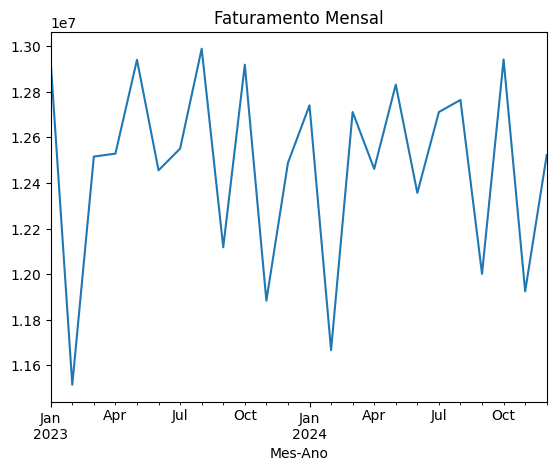

In [50]:
# Evolução do faturamento ao longo do tempo
df_analise["Mes-Ano"] = df_analise["Data"].dt.to_period("M")
df_vendas_mes = df_analise.groupby("Mes-Ano")["Faturamento"].sum()
df_vendas_mes.plot(title="Faturamento Mensal")


## Conclusão

Este projeto demonstrou como o Pandas pode ser utilizado para transformar dados brutos
em informações relevantes para tomada de decisão, passando por limpeza, enriquecimento
e análise de dados de vendas.
